In [12]:
import pandas as pd

df = pd.read_csv("../data/processed/clustered_house_data.csv")


In [13]:
df = df.drop(columns=['street', 'country'])


In [14]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_state = LabelEncoder()

df['city_encoded'] = le_city.fit_transform(df['city'])
df['statezip_encoded'] = le_state.fit_transform(df['statezip'])

df = df.drop(columns=['city', 'statezip'])


In [15]:
X = df.drop(columns=['price', 'cluster'])
y = df['price']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression MAE: 207692.75968791783
Linear Regression RMSE: 992723.2404236543


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)


Random Forest MAE: 165090.6846302885
Random Forest RMSE: 987439.9586052157


In [19]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

results


,Model,MAE,RMSE
0,Linear Regression,207692.759688,992723.240424
1,Random Forest,165090.684630,987439.958605


In [20]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


sqft_living         0.523858
statezip_encoded    0.091101
yr_built            0.070437
city_encoded        0.054752
sqft_above          0.049520
sqft_lot            0.048388
sqft_basement       0.039919
view                0.029934
bathrooms           0.029401
yr_renovated        0.013206
dtype: float64

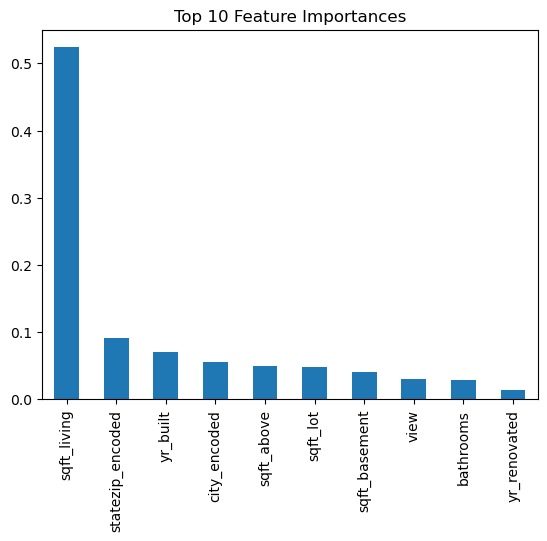

In [21]:
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


In [22]:
import joblib

joblib.dump(rf, "../models/price_regression_model.pkl")
joblib.dump(le_city, "../models/city_label_encoder.pkl")
joblib.dump(le_state, "../models/statezip_label_encoder.pkl")


['../models/statezip_label_encoder.pkl']

In [ ]:
joblib.dump(rf, "../models/price_regression_model.pkl")
joblib.dump(X.columns.tolist(), "../models/regression_features.pkl")

['../models/regression_features.pkl']

: 